In questo notebook costruiremo un modello predittivo per il dataset wine di scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#carichiamo il dataset
wine = datasets.load_wine()
print(wine["feature_names"])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Abbiamo 13 attributi numerici per predire una delle tre classi a cui appartiene un vino.

In [3]:
#trasformiamo il dataset in un dataframe per utilizzare seaborn e visualizzare la correlazione
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df["class"] = wine.target

In [4]:
#utilizziamo la codifica one-hot per manipolare meglio i dati relativi alle etichette (var. categoriche nominali)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = "ignore")
enc_df = pd.DataFrame(enc.fit_transform(df[["class"]]).toarray())
df = df.join(enc_df)
df = df.drop("class", axis = 1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0,1,2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0,0.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0,0.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0,0.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0,0.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0,0.0,0.0


<AxesSubplot:>

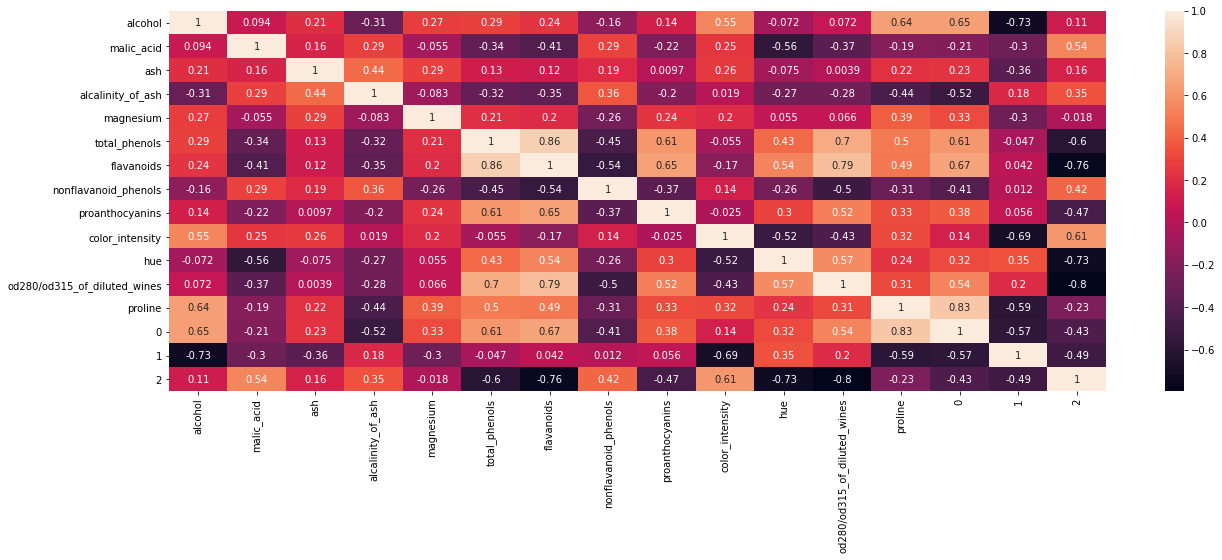

In [5]:
plt.figure(figsize = (21,7))
sns.heatmap(df.corr(), annot = True)

Tramite questa visualizzazione possiamo osservare le correlazioni tra gli attributi stessi e le classi. Osserviamo correlazioni e correlazioni inverse non trascurabili tra:

-flavanoidi e i fenoli totali (0.86)

-prolina e classe 0 (0.83)

-OD280/OD315 di vino diluito e flavanoidi (0.79)

-tinta e classe 2 (-0.73)

-alcool e classe 1 (-0.73)

-flavanoidi e classe 2 (-0.76)

-OD280/OD315 di vino diluito e classe 2 (-0.8)


In [6]:
#ripristiniamo il dataframe
df.drop([0, 1, 2], axis = 1, inplace = True)
df["class"] = wine["target"]

<AxesSubplot:xlabel='class', ylabel='count'>

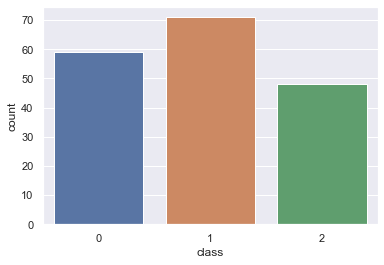

In [26]:
sns.set()
sns.countplot(x = "class", data = df)

Possiamo confermare che le tre classi hanno pressappoco lo stesso numero di samples.


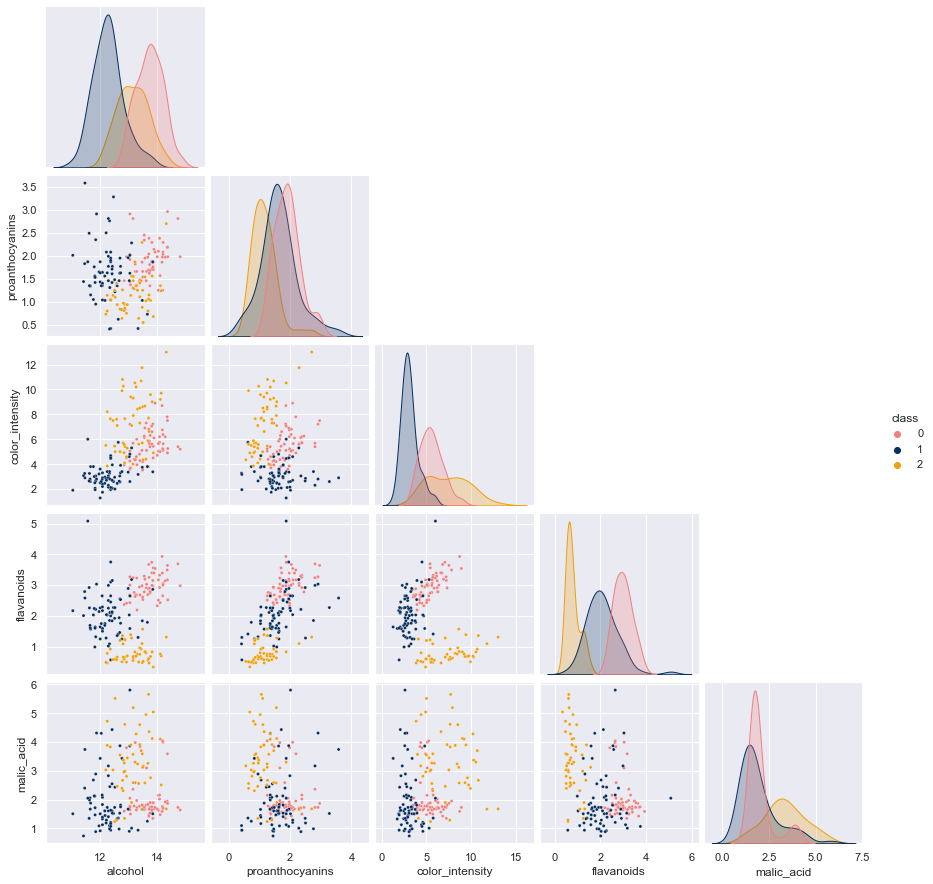

In [7]:
#analisi bivariata
cols = ["alcohol", "proanthocyanins", "color_intensity", "flavanoids", "malic_acid", "class"]
sns.pairplot(df[cols], 
             hue = "class", 
             palette = {0 : "#F08080", 1 : "#052F5F", 2 : "#EFA00B"}, 
             corner = True,
             diag_kws = {"fill" : True},
             plot_kws = {"s" : 10})
plt.show()

Il grafico è utile per osservare le relazioni tra due degli attributi del dataset, inoltre evidenziamo le seguenti caratteristiche relative ad esse:

-la classe 1 ha generalmente valori intermedi di acido malico e un'alta intensità del colore, mentre ha valori di flavanoidi più bassi rispetto alle altre classi e alto grado alcolico;

-la classe 0 ha valori intermedi di flavanoidi, media intensità di colore e alti valori di acido malico;

-la classe 2 invece ha alti valori di flavanoidi, una bassa intensità di colore, valori bassi di acido malico e infine medio grado alcolico;

-infine tutte e tre le classi hanno in linea di massima gli stessi valori di proantocianine, con la classe 2 di poco sotto alle altre;

In [8]:
x = wine["data"]
y = wine["target"]
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#dividiamo in train e test set i dati
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 111)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
#notiamo che le feature possono essere scalate in quanto i valori in X
#oscillano da 1e+00 a 1e+03
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

(142, 13) (36, 13)
(142,) (36,)


Utilizzeremo come modello predittivo per questo problema di classificazione l'albero di decisione. Sarà interessante valutare la performance del modello in base ai differenti valori degli iperparametri.
Ne valideremo tre in particolare:

-profondità massima (max_depth)

-minimo numero di samples per la separazione (min_samples_split)

-massimo numero di features da considerare quando si cerca lo split migliore (max_features)

In [16]:
from sklearn.tree import DecisionTreeClassifier as dt
#costruiamo il modello
model = dt()
#costruiamo un diz per i valori per gli iperparametri
params = {"max_depth" : [2, 5, 10, 25, 50, 100, None],
         "min_samples_split" : [0.001, 0.01, 0.1, 0.2],
         "max_features" : ["sqrt", "log2", None]}

1. Per max_depth sono stati scelti valori piccoli, intermedi e grandi (fino alla profondità massima), visto che questo è l'iperparametro più importante è bene validarlo nel modo più completo possibile.

2. Per min_samples_split sono stati utilizzati valori float per prendere parti più o meno ampie del dataset (x_train), anzichè prendere valori assoluti con gli interi.

3. Per max_features sono stati selezionati i criteri per considerare il numero migliore di features, dalla radice quadrata fino al numero di features totali.

Per validarli utilizzeremo la funzione GridSearch

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
#l'accuracy è una buona metrica in questo caso perchè è presente
#un numero di campioni simile in ogni classe
#costruiamo la griglia
grid = GridSearchCV(estimator = model,
                   param_grid = params,
                   scoring = "accuracy",
                   cv = 5,
                   verbose = 4)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_split=0.01; total time=   0.0s
[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_split=0.01; total time=   0.0s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_split=0.01; total time=   0.0s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_split=0.01; total time=   0.0s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_split=0.01; total time=   0.0s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samp

[CV 2/5] END max_depth=10, max_features=log2, min_samples_split=0.001; total time=   0.0s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_split=0.001; total time=   0.0s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_split=0.001; total time=   0.0s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_split=0.001; total time=   0.0s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_split=0.01; total time=   0.0s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_split=0.01; total time=   0.0s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_split=0.01; total time=   0.0s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_split=0.01; total time=   0.0s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_split=0.01; total time=   0.0s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_split=0.1; total time=   0.0s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_split=0.1; total time=   0.0s
[CV 3/5] END max_de

[CV 4/5] END max_depth=50, max_features=None, min_samples_split=0.1; total time=   0.0s
[CV 5/5] END max_depth=50, max_features=None, min_samples_split=0.1; total time=   0.0s
[CV 1/5] END max_depth=50, max_features=None, min_samples_split=0.2; total time=   0.0s
[CV 2/5] END max_depth=50, max_features=None, min_samples_split=0.2; total time=   0.0s
[CV 3/5] END max_depth=50, max_features=None, min_samples_split=0.2; total time=   0.0s
[CV 4/5] END max_depth=50, max_features=None, min_samples_split=0.2; total time=   0.0s
[CV 5/5] END max_depth=50, max_features=None, min_samples_split=0.2; total time=   0.0s
[CV 1/5] END max_depth=100, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 2/5] END max_depth=100, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 3/5] END max_depth=100, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 4/5] END max_depth=100, max_features=sqrt, min_samples_split=0.001; total time=   0.0s
[CV 5/5] END max_dep

[CV 5/5] END max_depth=None, max_features=log2, min_samples_split=0.01; total time=   0.0s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_split=0.1; total time=   0.0s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_split=0.1; total time=   0.0s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_split=0.1; total time=   0.0s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_split=0.1; total time=   0.0s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_split=0.1; total time=   0.0s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_split=0.2; total time=   0.0s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_split=0.2; total time=   0.0s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_split=0.2; total time=   0.0s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_split=0.2; total time=   0.0s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_split=0.2; total time=   0.0s
[CV 1/5] 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 25, 50, 100, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [0.001, 0.01, 0.1, 0.2]},
             scoring='accuracy', verbose=4)

In [27]:
print("Iperparametri migliori: ", grid.best_params_)
print("Punteggio migliore: {:.2f}".format(grid.best_score_))
#memorizziamo gli iperparametri migliori in una variabile
hypr = grid.best_params_

Iperparametri migliori:  {'max_depth': 10, 'max_features': None, 'min_samples_split': 0.1}
Punteggio migliore: 0.94


Costruiamo adesso il modello con gli iperparametri che hanno avuto la performance migliore.

In [22]:
best_model = dt(max_depth = hypr["max_depth"] , min_samples_split = hypr["min_samples_split"],
                max_features = hypr["max_features"])
best_model.fit(x_train, y_train)
pred = best_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print("Accuratezza del modello migliore sul test set: {:.2f}".format(acc))

Accuratezza del modello migliore sul test set: 0.92


Possiamo notare come il modello migliore non sia quello con l'altezza maggiore.

Possiamo ritenerci soddisfatti di questa performance, era da aspettarsi che non sarebbe stata buona come sul set di validazione, tuttavia è un buon risultato.